# 학습된 모델을 저장하고 불러오기
모델을 저장해두면 훈련없이 바로 사용할 수 있다. 모델을 저장하는 방법에는 아래와 같이 두가지가 있다


- 모델의 가중치 저장 
 - 가중치만 파일로 저장하고, 불러오는 방법
 - save_weights, load_weights는 가중치만 저장하기 때문에, 모델 architecture를 동일하게 만들어주어야 사용할 수있다.
    ```
    model.save_weights('myclassifier_weights')

    new_model= tf.keras.models.Sequential([
        tf.keras.layers.Dense(32, input_dim=x.shape[1]),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(2, activation='softmax')
    ])

    new_model.load_weights('myclassifier_weights')
    test_loss, test_acc = new_model.evaluate(x,  y, verbose=2)
    ```

- 모델 전체를 저장하고 불러오는 방법 
 - 모델과 훈련된 파라미터를 모두 다 저장
 - 구조를 알필요 없이 바로 로드하여 사용할 수 있다.

    ```
    model.save('myclassifier.h5)

    new_model = tf.keras.models.load_model('myclassifier.h5')
    test_loss, test_acc = new_model.evaluate(x,  y, verbose=2)

    ```

## 모델 저장하기

### 1. 모델 전체 저장하기

In [ ]:
import os
           
checkpoint_dir = os.getenv("HOME") + "/aiffel/cat_vs_dog/checkpoint"
checkpoint_file_path = checkpoint_dir +'myclassifier.h5' #모델저장 파일명
model.save(checkpoint_file_path)

if os.path.exists(checkpoint_file_path):
  print('checkpoint 파일 생성 OK!!')

myclassifier.h5 파일이 생성된다

### 2. 가중치 저장하기

In [ ]:
import os
checkpoint_dir = os.getenv("HOME") + "/aiffel/cat_vs_dog/checkpoint"
checkpoint_f
    
model.save_weights(checkpoint_file_path)     

if os.path.exists(checkpoint_file_path):
  print('checkpoint 파일 생성 OK!!')

- checkpoint
- checkpoint.data-00000-of-00001
- checkpoint.index
파일이 생성된다

## 모델 불러오기
 - 여기에서는 모델(h5)파일을 불러오는 방법만 사용해본다

In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import load_model

my_model = load_model('/content/drive/MyDrive/Colab Notebooks/Aiffel/01_Fundamental/fund14/data/checkpoint/checkpointmyclassifier.h5')


# 학습된 모델에 원하는 이미지를 입력해 예측 결과 확인
- 사용자의 고양이또는 강아지 이미지로 테스트해보자
- 이과제에서 만든 모델을 160*160 사이즈만 입력받으므로 미리 리사이즈해주어야하겠다

In [18]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt


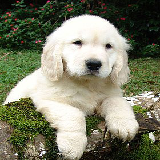

In [13]:
IMG_SIZE = 160
img_dir_path = '/content/drive/MyDrive/Colab Notebooks/Aiffel/01_Fundamental/fund14/data/images'
dog_image_path = os.path.join(img_dir_path, 'dog.jpg')

dog_image = load_img(dog_image_path, target_size=(IMG_SIZE, IMG_SIZE))
dog_image

모델에 넣을 수 있도록 이미지를 array, 즉 배열 자료형으로 변환해주자

In [14]:
dog_image = img_to_array(dog_image).reshape(1, IMG_SIZE, IMG_SIZE, 3)
dog_image.shape

(1, 160, 160, 3)

모델을 미리 불러왔으므로 훈련할필요없이 바로 테스트 해볼수 있다. 예측 값을 확인해보면 개에 대한 확률이 큰것을 알 수 있다

In [15]:
prediction = model.predict(dog_image)
prediction

array([[7.4761246e-08, 9.9999988e-01]], dtype=float32)

테스트 이미지를 불러와 예측하는 과정을 함수화 해보았다.

In [16]:
def show_and_predict_image(dirpath, filename, img_size=160):
    filepath = os.path.join(dirpath, filename)
    image = load_img(filepath, target_size=(img_size, img_size))
    plt.imshow(image)
    plt.axis('off')
    image = img_to_array(image).reshape(1, img_size, img_size, 3)
    prediction = model.predict(image)[0]
    cat_percentage = round(prediction[0] * 100)
    dog_percentage = round(prediction[1] * 100)
    print(f"This image seems {dog_percentage}% dog, and {cat_percentage}% cat.")

This image seems 100% dog, and 0% cat.


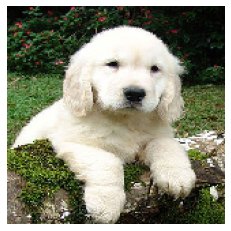

In [19]:
filename = 'dog.jpg'

show_and_predict_image(img_dir_path, filename)

This image seems 100% dog, and 0% cat.


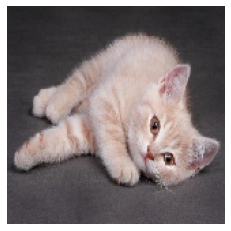

In [20]:
filename = 'cat.png'

show_and_predict_image(img_dir_path, filename)

This image seems 100% dog, and 0% cat.


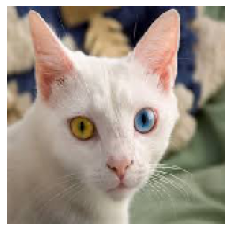

In [21]:
filename = "cat2.jfif"
show_and_predict_image(img_dir_path, filename)

This image seems 70% dog, and 30% cat.


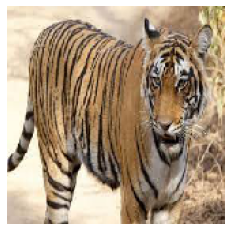

In [22]:
filename = "notacat.jfif"
show_and_predict_image(img_dir_path, filename)

미리 훈련시킨 모델이 있어 쉽게 테스트가 가능했다. 이제 텐서플로우의 새로운 토이데이터셋을 다운받아 직접모델을 만들어보고 예측까지하는 과정도 진행해보자